# Modeling

This notebook will be used for modeling.

# Libraries

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import time
import seaborn as sns
import numpy as np
# from pandasql import sqldf
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import glob
# import matplotlib.pyplot as plt
# import math
# import statsmodels.api as sm

# Functions

In [128]:
class model():
    
    '''
    The class is used to repeat the standard tasks associated with the model
    '''
    
    def __init__(self, modelType, df, scale):
        
        '''
        Initialize the model, defines X and y, split train and test
        
        modelType - defines the model class
        df - the data frame
        '''
        
        # Define the target
        self.y = df['goals_total']

        # Define the features
        self.X = df.drop(['goals_total'], axis=1)
        
        # Split train and test
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=7)
        
        # Scale
        if scale:
            scaler = StandardScaler()
            self.X_train = scaler.fit_transform(self.X_train)
            self.X_test = scaler.transform(self.X_test)

        self.modelType = modelType
    
    def fit(self):
        
        '''
        Fit the model
        '''
    
        startTime = time.time()
        self.modelType.fit(self.X_train, self.y_train)
        self.learnTime = round(time.time() - startTime, 4)
        
    def predict(self):
        
        '''
        Predict using the model
        '''
        
        startTime = time.time()
        model_prediction_train = self.modelType.predict(self.X_train)
        model_prediction_test = self.modelType.predict(self.X_test)
        self.predictTime = round(time.time() - startTime, 4)
        
    def score(self, type):
        
        '''
        Returns the score
        
        type - either train or test
        '''
        
        if type == 'train':
            return round(self.modelType.score(self.X_train, self.y_train), 4)
        else:
            return round(self.modelType.score(self.X_test, self.y_test), 4)
        
    def save(self, index):
        
        '''
        Save into the summary data frame
        
        index - index value of the row
        '''
        
        dfModelSummary.loc['train score', index] = round(self.modelType.score(self.X_train, self.y_train), 4)
        dfModelSummary.loc['test score', index] = round(self.modelType.score(self.X_test, self.y_test), 4)
        
        dfModelSummary.loc['learning time', index] = self.learnTime
        dfModelSummary.loc['prediction time', index] = self.predictTime
        
    def coef(self):
        return self.modelType.coef_

# Initialization

In [129]:
# Display all columns
pd.set_option('display.max_columns', None)

# Intialize the summary data frame
indexSummary = ['number of features','scaling','transformation','hyper-parameters tuning','train score','test score',\
              'learning time','prediction time','other changes']

dfModelSummary = pd.DataFrame(index=indexSummary)

# Load from files

In [130]:
dfFootballML = pd.read_csv('data/football_ml.csv')
dfFootballMLBench = pd.read_csv('data/football_ml_bench.csv')

# Modeling

I will try to use differnet models, features, approaches. I will start building from the basic to more advanced.

In [131]:
dfModelSummary

""
number of features
scaling
transformation
hyper-parameters tuning
train score
test score
learning time
prediction time
other changes


## Dummy regressor

Very simple model justs to create a baseline.

### 0th iteration

Run the model

In [132]:
# Build the model
DummyRegressionModel = model(DummyRegressor(strategy="quantile", quantile=0.5), dfFootballML, False)

# Fit the model
DummyRegressionModel.fit()

# Predict based on the model
DummyRegressionModel.predict()

Evaluate the results

In [133]:
print(f'Train score: {DummyRegressionModel.score("train")}')
print(f'Test score: {DummyRegressionModel.score("test")}')

Train score: -0.2004
Test score: -0.1943


#### Conclusion

> - The model is very basic and can't even be used as a base one. I will use a Linear Regression as a base model.

## Linear regression

### 1th iteration

The initial run.

Define the summary parameters

In [134]:
modelSummary = 'Linear regression'

modelVersion = '1.0'

dfModelSummary.loc['number of features', modelSummary + ' ' + modelVersion] = dfFootballML.shape[1] - 1

dfModelSummary.loc['scaling', modelSummary + ' ' + modelVersion] = '-'

dfModelSummary.loc['transformation', modelSummary + ' ' + modelVersion] = '-'

dfModelSummary.loc['hyper-parameters tuning', modelSummary + ' ' + modelVersion] = '-'

Run the model

In [135]:
# Build the model
LinearRegressionModel = model(LinearRegression(), dfFootballML, False)

# Fit the model
LinearRegressionModel.fit()

# Predict based on the model
LinearRegressionModel.predict()

# Save the results
LinearRegressionModel.save(modelSummary + ' ' + modelVersion)

Evaluate the results

In [136]:
dfModelSummary

,Linear regression 1.0
number of features,24.0
scaling,-
transformation,-
hyper-parameters tuning,-
train score,0.6261
test score,0.6316
learning time,0.0289
prediction time,0.0036
other changes,NaN


#### Conclusion

> - The very first run, nothing to compare with.
> - The model explains at least 62% of the data. Not bad, let's try to improve it.

### 2nd iteration

Let's reduce the number of columns to see if we can get similar results.

#### Remove the features we are not interested in

To do that I will check the coeficients

In [137]:
for i, j in zip(LinearRegressionModel.X.columns, LinearRegressionModel.coef()):
    print(f'To score 1 goal a plyer needs to increase/descrease {i} by {round(1/j)}')

To score 1 goal a plyer needs to increase/descrease player_age by 213
To score 1 goal a plyer needs to increase/descrease player_height by 440
To score 1 goal a plyer needs to increase/descrease games_minutes by 1116
To score 1 goal a plyer needs to increase/descrease substitutes_in by 39
To score 1 goal a plyer needs to increase/descrease substitutes_out by 7
To score 1 goal a plyer needs to increase/descrease substitutes_bench by -54
To score 1 goal a plyer needs to increase/descrease shots_on by 3
To score 1 goal a plyer needs to increase/descrease goals_assists by 11
To score 1 goal a plyer needs to increase/descrease passes_total by -920
To score 1 goal a plyer needs to increase/descrease passes_key by -32
To score 1 goal a plyer needs to increase/descrease passes_accuracy by -244
To score 1 goal a plyer needs to increase/descrease tackles_total by -164
To score 1 goal a plyer needs to increase/descrease tackles_blocks by 88
To score 1 goal a plyer needs to increase/descrease tack

I will remove the following features:

- **player_age, player_height, venue_capacity** - numbers don't make sense, they are too high and maybe can be transformed.
- **passes_accuracy** - numbers don't make sense, it is percentage, needs to be transformed.
- **penalty_won, penalty_missed** - the penalty is directly related to goals, it is obvious information.

In [138]:
# Saved for the future transformation
dfFootballMLBench = pd.concat([dfFootballMLBench, dfFootballML[['player_age','player_height','passes_accuracy','venue_capacity',\
                                                              'penalty_won','penalty_missed']]], axis=1)

dfFootballML = dfFootballML.drop(['player_age','player_height','passes_accuracy','venue_capacity','penalty_won','penalty_missed'\
                                 ], axis=1)

Define the summary parameters

In [139]:
modelSummary = 'Linear regression'

modelVersion = '1.1'

dfModelSummary.loc['number of features',modelSummary + ' ' + modelVersion] = dfFootballML.shape[1] - 1

dfModelSummary.loc['scaling',modelSummary + ' ' + modelVersion] = '-'

dfModelSummary.loc['transformation',modelSummary + ' ' + modelVersion] = '-'

dfModelSummary.loc['hyper-parameters tuning',modelSummary + ' ' + modelVersion] = '-'

Run the model

In [140]:
# Build the model
LinearRegressionModel = model(LinearRegression(), dfFootballML, False)

# Fit the model
LinearRegressionModel.fit()

# Predict based on the model
LinearRegressionModel.predict()

# Save the results
LinearRegressionModel.save(modelSummary + ' ' + modelVersion)

Evaluate the results

In [141]:
dfModelSummary

,Linear regression 1.0,Linear regression 1.1
number of features,24.0,18.0
scaling,-,-
transformation,-,-
hyper-parameters tuning,-,-
train score,0.6261,0.6211
test score,0.6316,0.6264
learning time,0.0289,0.0094
prediction time,0.0036,0.0022
other changes,NaN,NaN


#### Conclusion

> - Analyzing the coefficients I reduced the number of features.
> - Removing 6 features didn't impact the result. We can continue with the same set of features.

### 3rd iteration

I will perform the scaling of the features to improve the result.

Define the summary parameters

In [142]:
modelSummary = 'Linear regression'

modelVersion = '1.2'

dfModelSummary.loc['number of features',modelSummary + ' ' + modelVersion] = dfFootballML.shape[1] - 1

dfModelSummary.loc['scaling',modelSummary + ' ' + modelVersion] = 'Yes'

dfModelSummary.loc['transformation',modelSummary + ' ' + modelVersion] = '-'

dfModelSummary.loc['hyper-parameters tuning',modelSummary + ' ' + modelVersion] = '-'

Run the model

In [143]:
# Build the model
LinearRegressionModel = model(LinearRegression(), dfFootballML, True)

# Fit the model
LinearRegressionModel.fit()

# Predict based on the model
LinearRegressionModel.predict()

# Save the results
LinearRegressionModel.save(modelSummary + ' ' + modelVersion)

Evaluate the results

In [144]:
dfModelSummary

,Linear regression 1.0,Linear regression 1.1,Linear regression 1.2
number of features,24.0,18.0,18.0
scaling,-,-,Yes
transformation,-,-,-
hyper-parameters tuning,-,-,-
train score,0.6261,0.6211,0.6211
test score,0.6316,0.6264,0.6264
learning time,0.0289,0.0094,0.0126
prediction time,0.0036,0.0022,0.0007
other changes,NaN,NaN,NaN


#### Conclusion

> - I tried to apply scaling but it returned the same result. Hence we do not need to use scaling for this model.

## SGD regression

### 1st iteration

I will run the regressor with the default parameters.

Define the summary parameters

In [145]:
modelSummary = 'SGD regression'

modelVersion = '2.0'

dfModelSummary.loc['number of features',modelSummary + ' ' + modelVersion] = dfFootballML.shape[1] - 1

dfModelSummary.loc['scaling',modelSummary + ' ' + modelVersion] = '-'

dfModelSummary.loc['transformation',modelSummary + ' ' + modelVersion] = '-'

dfModelSummary.loc['hyper-parameters tuning',modelSummary + ' ' + modelVersion] = '-'

Run the model

In [146]:
# Build the model
SGDRegressionModel = model(SGDRegressor(), dfFootballML, True)

# Fit the model
SGDRegressionModel.fit()

# Predict based on the model
SGDRegressionModel.predict()

# Save the results
SGDRegressionModel.save(modelSummary + ' ' + modelVersion)

Evaluate the results

In [147]:
dfModelSummary

,Linear regression 1.0,Linear regression 1.1,Linear regression 1.2,SGD regression 2.0
number of features,24.0,18.0,18.0,18.0
scaling,-,-,Yes,-
transformation,-,-,-,-
hyper-parameters tuning,-,-,-,-
train score,0.6261,0.6211,0.6211,0.6166
test score,0.6316,0.6264,0.6264,0.623
learning time,0.0289,0.0094,0.0126,0.0587
prediction time,0.0036,0.0022,0.0007,0.0017
other changes,NaN,NaN,NaN,NaN


#### Conclusion

> - I got the same results as the linear model. However, this model supports hyper-parameters tunning. Let's apply them.

## KNN regressor

## Decision tree regressor

## Random forest

## SVN

## players/teams with a top/lowest number of goals scored/conceded in a single season

## compare leagues/seasons for total number of goals 

## Add the same set of features for each player but grouped for the team


# Other

In [83]:
df1 = pd.concat([dfFootballML[['goals_total']],dfFootballMLBench[['player_age']]**2], axis=1)

df1.corr()

,goals_total,player_age
goals_total,1.000000,0.137204
player_age,0.137204,1.000000


<AxesSubplot:xlabel='player_age', ylabel='goals_total'>

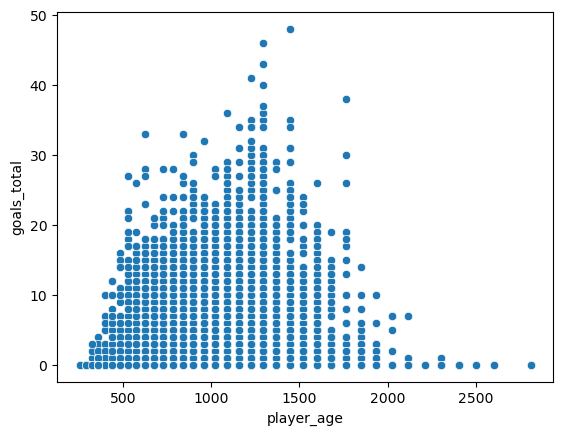

In [75]:
sns.scatterplot(y=dfFootballML['goals_total'],x=dfFootballMLBench['player_age']**2)

In [72]:
np.sqrt(dfFootballMLBench['player_age'])

0        6.082763
1        5.916080
2        5.744563
3        4.472136
4        4.472136
           ...   
65856    5.744563
65857    5.916080
65858    6.164414
65859    5.567764
65860    5.916080
Name: player_age, Length: 65861, dtype: float64

In [6]:
y = dfFootballML['goals_total']

# Define the features
X = dfFootballML.drop(['goals_total'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [47]:
df = pd.DataFrame({'X':[1,2,3,4,5], 'y':[2,2,3,3,4]})

X = df.drop('y', axis=1)

y = df['y']

X

df

,X,y
0,1,2
1,2,2
2,3,3
3,4,3
4,5,4


In [48]:
from sklearn.linear_model import LogisticRegression

# no scaling
model1 = LinearRegression()
# model1 = LogisticRegression()

model1.fit(X, y)

print(model1.score(X, y))
print(model1.coef_)

0.8928571428571428
[0.5]


In [110]:
model1.coef_

array([0.5])

In [38]:

# scaling
model2 = LinearRegression()
# model2 = LogisticRegression()

scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
# X_scaled_test = scaler.transform(X_test)

model2_fit = model2.fit(X_scaled, y)

print(model2_fit.score(X_scaled, y))
print(model2.coef_)

0.8928571428571429
[0.70710678]


In [63]:
pd.DataFrame(X_scaled)[0]

0   -1.414214
1   -0.707107
2    0.000000
3    0.707107
4    1.414214
Name: 0, dtype: float64

<AxesSubplot:xlabel='X', ylabel='y'>

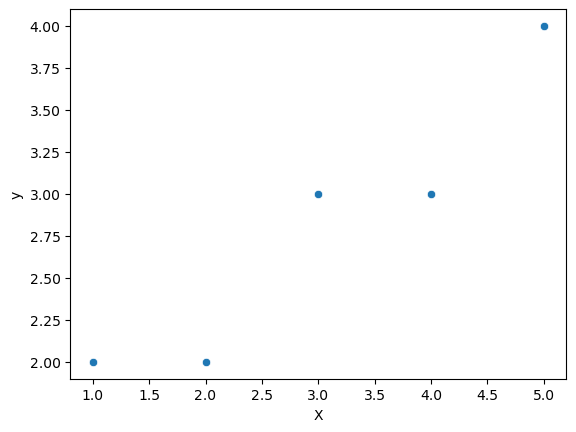

In [58]:
sns.scatterplot(data=df,x='X',y='y')

<AxesSubplot:xlabel='0', ylabel='y'>

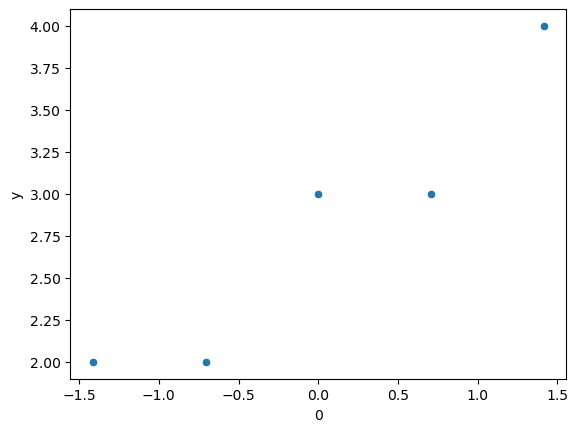

In [64]:
sns.scatterplot(x=pd.DataFrame(X_scaled)[0],y=df['y'])